# **Importing Libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sqlite3
!pip install folium
import folium
!pip install geopy
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 923.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.1 MB/s eta 0:00:00


# **Databases connections**

In [12]:
conn = sqlite3.connect('/content/drive/MyDrive/dataset/yelp_database.db')

In [13]:
tables = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'", conn)
tables


,type,name,tbl_name,rootpage,sql
0,table,users,users,2,"CREATE TABLE ""users"" (\n ""user_id"" INTEGER ..."
1,table,checkins,checkins,1186611,"CREATE TABLE ""checkins"" (\n""business_id"" TEXT,..."
2,table,tips,tips,1263518,"CREATE TABLE ""tips"" (\n""user_id"" TEXT,\n ""bus..."
3,table,businesses,businesses,3,"CREATE TABLE ""businesses"" (\n""business_id"" TEX..."
4,table,reviews,reviews,4,"CREATE TABLE ""reviews"" (\n""review_id"" TEXT,\n ..."


In [14]:
#exploring the data stored in the tables of databases

for table in tables['name']:
  display(pd.read_sql_query(f"SELECT * FROM {table} limit 5", conn))

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014",[463996],1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,1,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...",[],1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,2,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011",[1094856],16,...,1,3,0,0,5,20,31,31,3,1
3,3,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014",[],420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,4,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011",[],47,...,19,32,16,15,77,131,310,310,98,44


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


# **Data Analysis**

In [15]:
pd.read_sql_query("SELECT count(*) FROM businesses", conn)

,count(*)
0,150346


In [16]:
business_id = pd.read_sql_query(""" select business_id, review_count from businesses where lower(categories) like '%restaurant%' and is_open=1""", conn)

In [17]:
#what is the descriptive stats for reviews count and star rating for businesses?
#avg, min, median

pd.read_sql_query(f"""SELECT
AVG(review_count) AS average_review_count,
MIN(review_count) AS min_review_count,
MAX(review_count) AS max_review_count,
(SELECT review_count FROM businesses ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM businesses) / 2) AS median_review_count,
AVG(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM businesses ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM businesses) / 2) AS median_star_rating
FROM businesses
WHERE business_id IN {tuple(business_id['business_id'])};
""", conn).transpose()

,0
average_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [18]:
def remove_outliers (df, col):
  q1=df[col].quantile (0.25)
  q3=df[col].quantile (0.75)
  iqr=q3-q1
  lower_bound=q1-1.5 * iqr
  upper_bound = q3 +1.5 * iqr
  df = df [(df [col] >= lower_bound) & (df [col] <= upper_bound)]
  return df

In [19]:
business_id = remove_outliers(business_id, 'review_count')

In [20]:
business_id.shape

(31537, 2)

In [21]:
pd.read_sql_query(f"""SELECT
AVG(review_count) AS average_review_count,
MIN(review_count) AS min_review_count,
MAX(review_count) AS max_review_count,
(SELECT review_count FROM businesses ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM businesses) / 2) AS median_review_count,
AVG(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM businesses ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM businesses) / 2) AS median_star_rating
FROM businesses
WHERE business_id IN {tuple(business_id['business_id'])};
""", conn).transpose()

,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [22]:
# which restaurant have the highest number of reviews?

pd.read_sql_query(f"""SELECT name, sum(review_count) AS review_count, avg(stars) AS average_star_rating
FROM businesses
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY review_count DESC
LIMIT 10;
""", conn)


,name,review_count,average_star_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [23]:
pd.read_sql_query(f"""SELECT name, sum(review_count) AS review_count, avg(stars) AS average_star_rating
FROM businesses
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY average_star_rating DESC
LIMIT 10;
""", conn)


,name,review_count,average_star_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [24]:
# do restraunts with higher engagements tends to have higher ratings?

pd.read_sql_query(""" select business_id,
sum(length(date)-length(replace(date,',','' )) +1) as checkin_count
from checkins
group by business_id
order by checkin_count desc
 """,conn)

,business_id,checkin_count
0,-QI8Qi8XWH3D8y8ethnajA,52144
1,FEXhWNCMkv22qG04E83Qjg,40109
2,Eb1XmmLWyt_way5NNZ7-Pw,37562
3,c_4c5rJECZSfNgFj7frwHQ,37518
4,4i4kmYm9wgSNyF1b6gKphg,31168
...,...,...
131925,-1owBLC2h6DF5n_j77oq3g,1
131926,-1g8Qb6t_mSX_ak1thMmrQ,1
131927,-18_wKpOm836Z6snHOm9KQ,1
131928,--zb12mw2YK-7j6UaHzm8w,1


In [25]:
pd.read_sql_query(""" select business_id, count(*) tip
from tips
group by business_id
order by tip desc
 """,conn)

,business_id,tip
0,FEXhWNCMkv22qG04E83Qjg,2571
1,-QI8Qi8XWH3D8y8ethnajA,1011
2,_ab50qdWOk0DdB6XOrBitw,932
3,ytynqOUb3hjKeJfRj5Tshw,827
4,Eb1XmmLWyt_way5NNZ7-Pw,826
...,...,...
106188,--_9CAxgfXZmoFdNIRrhHA,1
106189,--ZWv8kGlM2YL58uKhGJDg,1
106190,--FWWsIwxRwuw9vIMImcQg,1
106191,--9osgUCSDUWUkoTLdvYhQ,1


In [26]:

# Final combined SQL query
final_query = """
WITH checkin_counts AS (
    SELECT
        business_id,
        SUM(LENGTH(date) - LENGTH(REPLACE(date, ',', '')) + 1) AS checkin_count
    FROM
        checkins
    GROUP BY
        business_id
),
tip_counts AS (
    SELECT
        business_id,
        COUNT(business_id) AS tip_count
    FROM
        tips
    GROUP BY
        business_id
)
SELECT
    b.stars AS rating,
    AVG(b.review_count) AS avg_review_count,
    AVG(IFNULL(c.checkin_count, 0)) AS avg_checkin_count,
    AVG(IFNULL(t.tip_count, 0)) AS avg_tip_count
FROM
    businesses b
LEFT JOIN
    checkin_counts c ON b.business_id = c.business_id
LEFT JOIN
    tip_counts t ON b.business_id = t.business_id
GROUP BY
    b.stars
"""

# Execute the final query
review_count_df = pd.read_sql_query(final_query, conn)

review_count_df


,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,13.444109,4.745720,0.674723
1,1.5,20.527372,20.452960,1.900041
2,2.0,21.947937,35.349323,2.456282
3,2.5,27.093951,58.586127,3.579631
4,3.0,36.119547,85.852328,5.362380
5,3.5,51.179268,113.615860,7.599268
6,4.0,71.465863,150.687936,10.075791
7,4.5,55.333726,93.425481,6.915382
8,5.0,16.462501,14.982032,1.318697


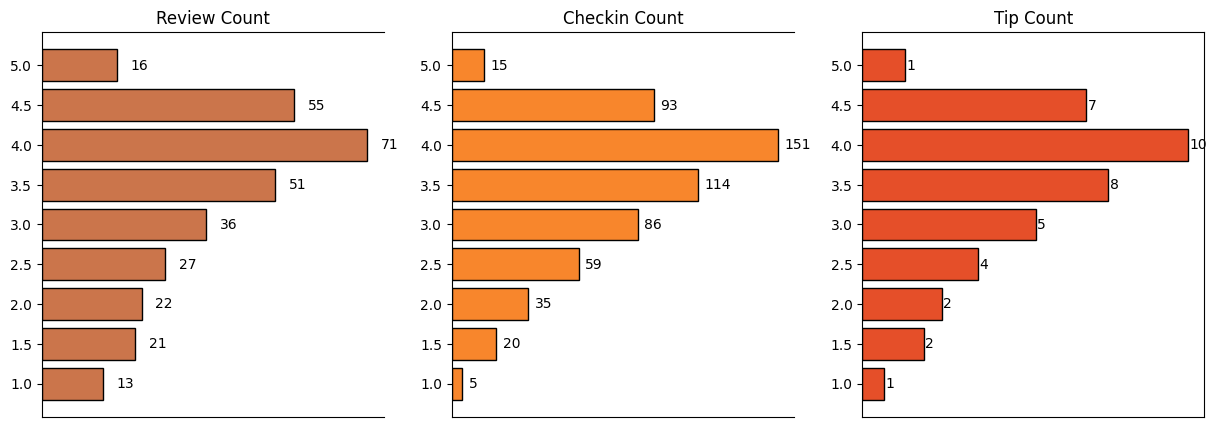

In [27]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines ['right'].set_visible (False)
for i, value in enumerate (review_count_df ['avg_review_count']):
  plt.text(value+3, i, str(round(value)), color='black', va='center')
plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines ['right'].set_visible (False)
for i, value in enumerate (review_count_df ['avg_checkin_count']):
  plt.text(value+3, i, str(round (value)), color='black', va='center')
plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_tip_count'], edgecolor = 'k', color='#E54F29')
for i, value in enumerate (review_count_df ['avg_tip_count']):
  plt.text(value+0.05, i, str(round (value)), color='black', va='center')
plt.xticks([])
plt.show()

In [28]:
# Is there a correlation between the number of reviews, tips, and check-ins for a business?
engagement_df=pd.read_sql_query(f"""SELECT
b.business_id,
SUM(b.review_count) AS review_count,
AVG(b.stars) AS avg_rating,
SUM (LENGTH(cc.date)- LENGTH (REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
SUM(tip.tip_count) as tip_count,
(case when b.stars >= 3.5 then 'high-rated' else 'low-rated' end ) category
FROM
businesses b
LEFT JOIN
checkins cc ON b.business_id = cc.business_id
LEFT JOIN
(select business_id, count (business_id) as tip_count from tips GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple (business_id ['business_id'])}
GROUP BY
b.business_id
""", conn).dropna()

In [29]:
engagement_df[['review_count', 'tip_count', 'checkin_count']].corr()

,review_count,tip_count,checkin_count
review_count,1.000000,0.766321,0.626884
tip_count,0.766321,1.000000,0.772088
checkin_count,0.626884,0.772088,1.000000


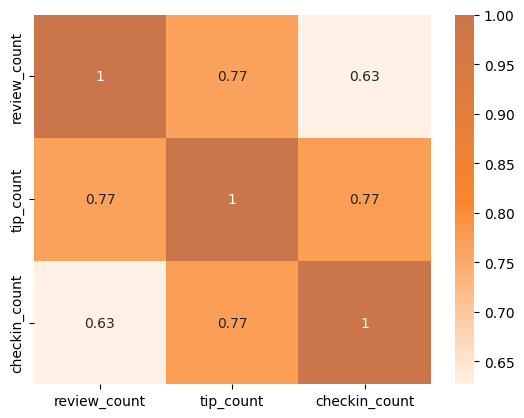

In [30]:
colours= ['#FfF1E5' ,'#F8862C','#CB754B']
sns.heatmap(engagement_df[['review_count', 'tip_count', 'checkin_count']].corr(), annot=True, cmap=LinearSegmentedColormap.from_list('custom', colours))
plt.show()

In [31]:
# Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?
engagement_df.groupby("category") [ ['review_count', 'tip_count', 'checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
high-rated,72.291062,10.162766,122.066641
low-rated,42.123420,6.541689,88.880828


In [32]:
#function to calculate the success score based on the avg rating and total review count
def calculate_success_metric (df):
  success_score = []
  for index, row in df.iterrows():
    score = row['avg_rating'] * np.log(row['review_count'] + 1)
    success_score.append(score)
  return success_score

In [33]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?
city_df=pd.read_sql_query(f"""select city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count,
count(*) as restaurant_count
from businesses
WHERE business_id IN {tuple (business_id [
  'business_id'])}
group by state, city
order by review_count desc
limit 10 """, conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [34]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [35]:
# Create a base map
m = folium.Map(location= [city_df ['latitude'].mean(), city_df ['longitude'].mean()], zoom_start=4)
# Define a color scale
color_scale = folium. LinearColormap (colors=['green', 'yellow', '#E54F29'],
vmin=city_df ['success_score'].min(),
vmax=city_df ['success_score'].max())
# Add markers to the map
for index, row in city_df.iterrows():
  folium.CircleMarker(
  location=[row['latitude'], row['longitude']],
  radius=5,
  color=color_scale (row['success_score']),
  fill=True,
  fill_color=color_scale (row['success_score']),
  fill_opacity=0.7,
  popup=f"Success Score: {row['success_score']}"
  ).add_to(m)
# Add color scale to the map
m.add_child(color_scale)

In [36]:
#Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants?
high_rated_engagement = pd.read_sql_query(f"""
SELECT reviews.month_year, reviews.review_count, tips.tips_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM reviews
WHERE business_id IN {tuple (business_id ['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as reviews
JOIN
(SELECT AVG(b.stars), strftime( '%m-%Y', tips.date) AS month_year, COUNT(*) AS tips_count
FROM tips
JOIN businesses as b
on tips.business_id = b.business_id
WHERE tips.business_id IN {tuple (business_id ['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tips
on reviews.month_year = tips.month_year
;""", conn)

low_rated_engagement = pd.read_sql_query(f"""
SELECT reviews.month_year, reviews.review_count, tips.tips_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM reviews
WHERE business_id IN {tuple (business_id ['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as reviews
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tips.date) AS month_year, COUNT(*) AS tips_count
FROM tips
JOIN businesses as b
on tips.business_id = b.business_id
WHERE tips.business_id IN {tuple (business_id ['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tips
on reviews.month_year = tips.month_year
;""",conn)

In [37]:
high_rated_engagement

,month_year,review_count,tips_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [38]:
low_rated_engagement

,month_year,review_count,tips_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [39]:
time_rating = pd.read_sql_query(f"""SELECT strftime( '%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM reviews
WHERE business_id IN {tuple (business_id ['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""",conn)

In [40]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [44]:
time_rating ['month_year'] = pd.to_datetime (time_rating ['month_year'])
time_rating.sort_values('month_year', inplace=True)
time_rating=time_rating [time_rating ['month_year']>'2017']
high_rated_engagement ['month_year'] = pd.to_datetime (high_rated_engagement ['month_year'])
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement [high_rated_engagement ['month_year']>'2017']
low_rated_engagement ['month_year'] = pd.to_datetime (low_rated_engagement ['month_year'])
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement [low_rated_engagement ['month_year']>'2017']

In [45]:
high_rated_engagement ['avg_rating'] = time_rating ['avg_rating'].values

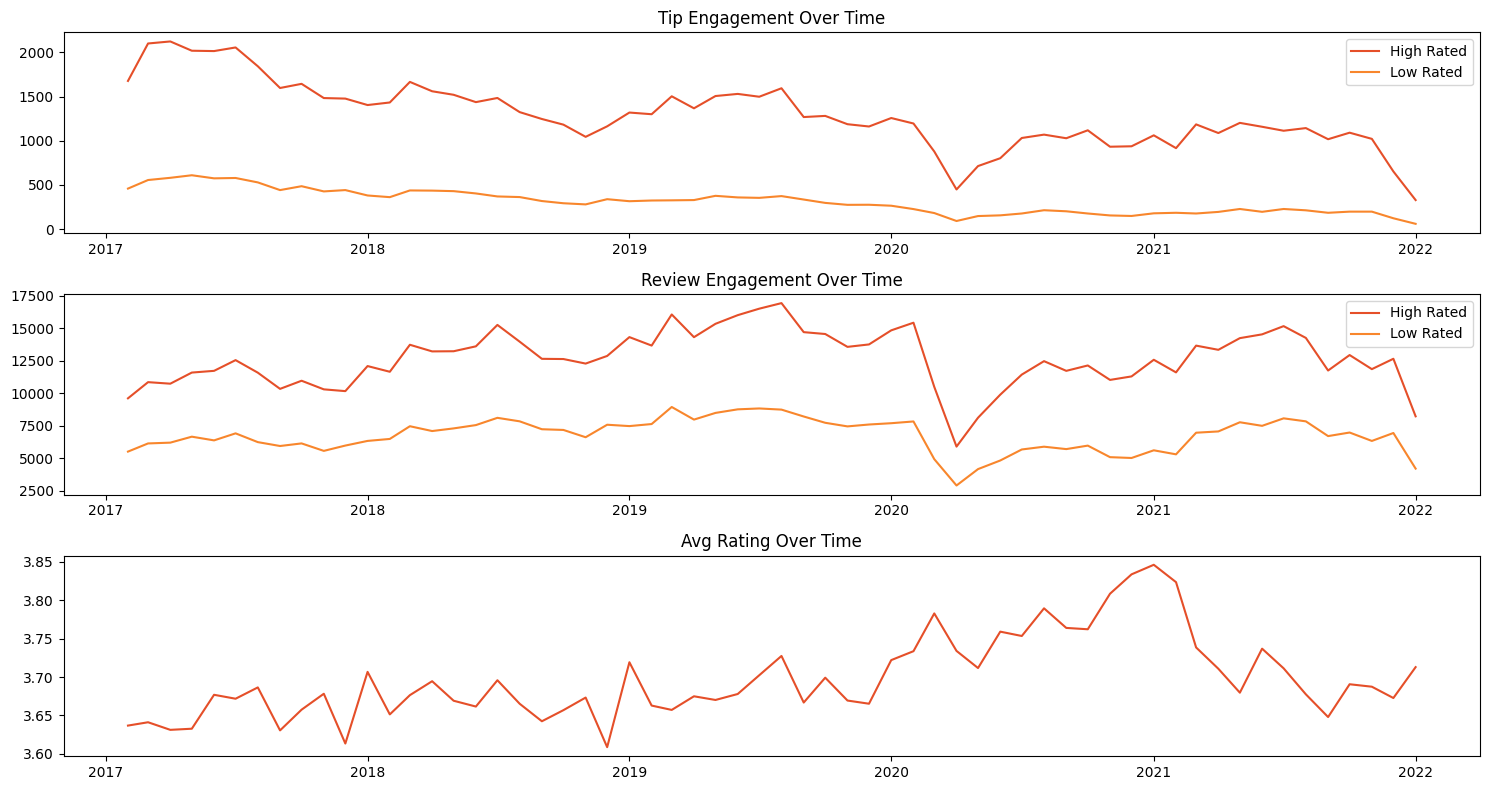

In [49]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tips_count'], label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tips_count'], label='Low Rated', color='#F8862C')
plt.legend()
plt.subplot(3, 1, 2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label='Low Rated', color='#F8862C')
plt.legend()
plt.subplot(3, 1, 3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating ['month_year'], time_rating ['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [51]:
tip_high_rated = high_rated_engagement [ ['month_year', 'tips_count']].set_index('month_year' )
review_high_rated = high_rated_engagement [ ['month_year', 'review_count']].set_index('month_year')
rating_df = time_rating [['month_year', 'avg_rating']].set_index('month_year' )

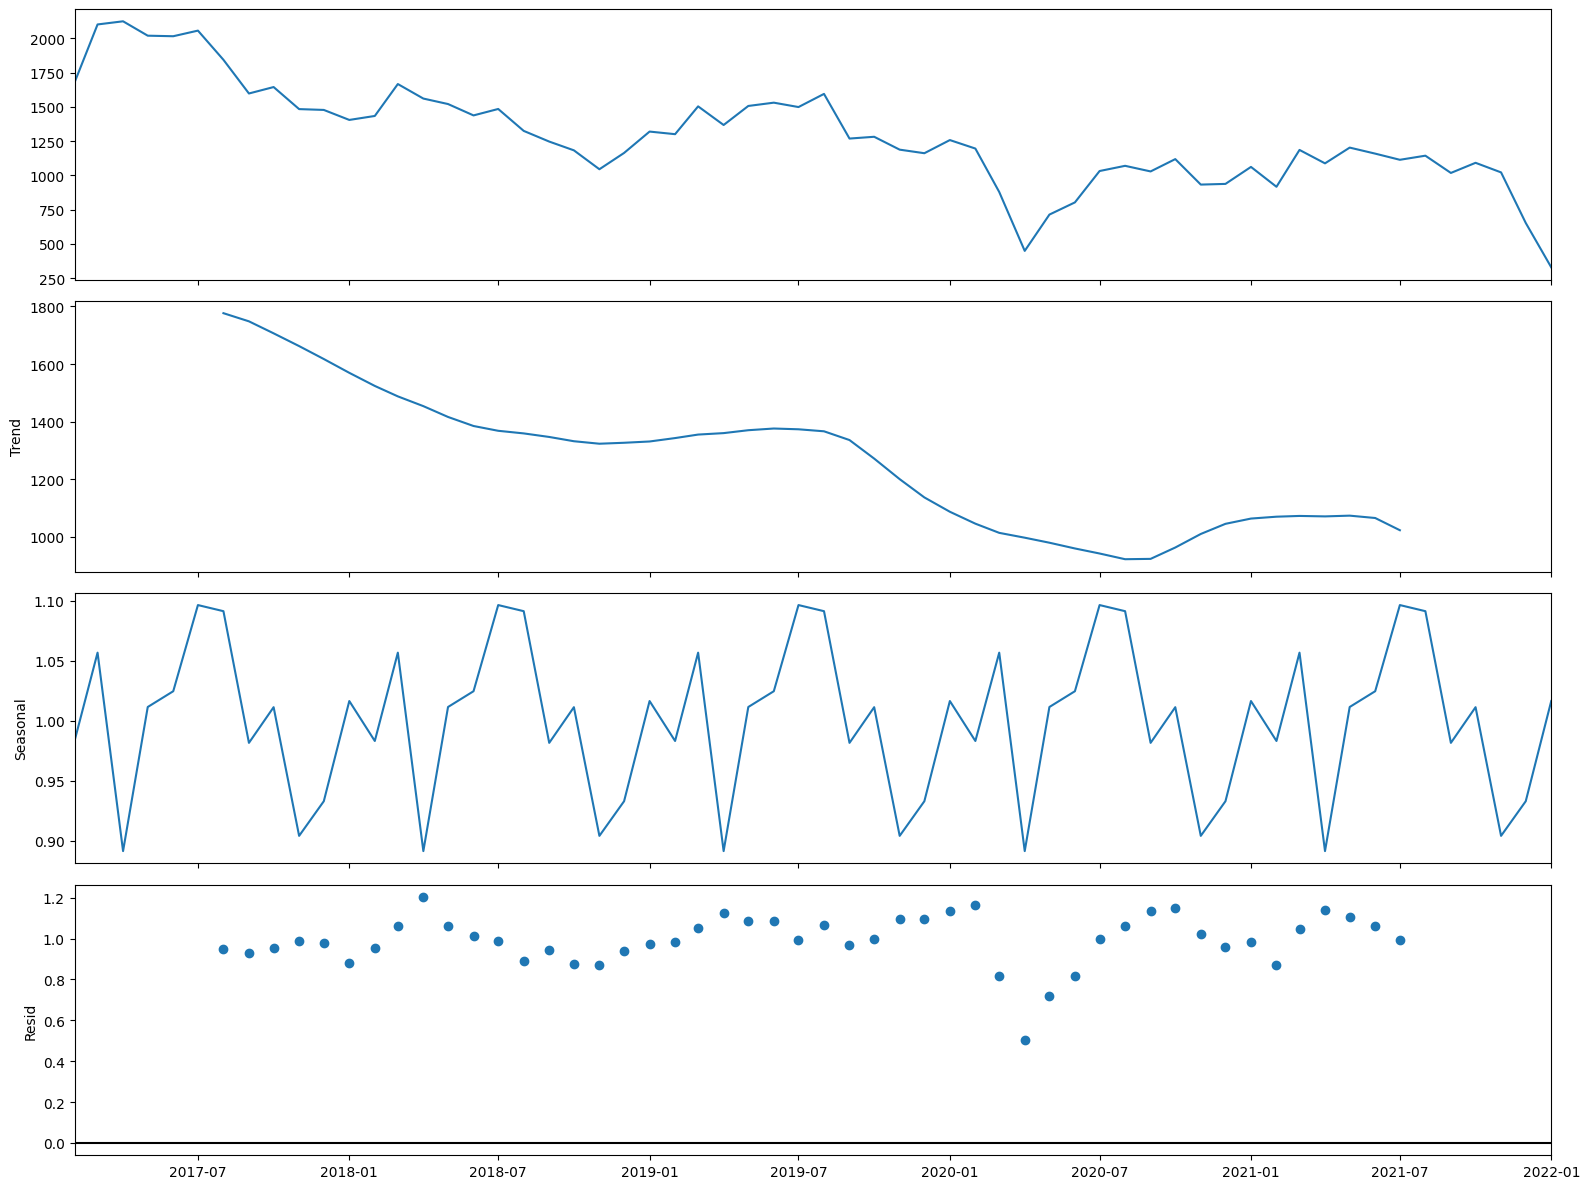

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition= seasonal_decompose(tip_high_rated, model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize' : (16,12)})
multiplicative_decomposition.plot ( )
plt.show( )

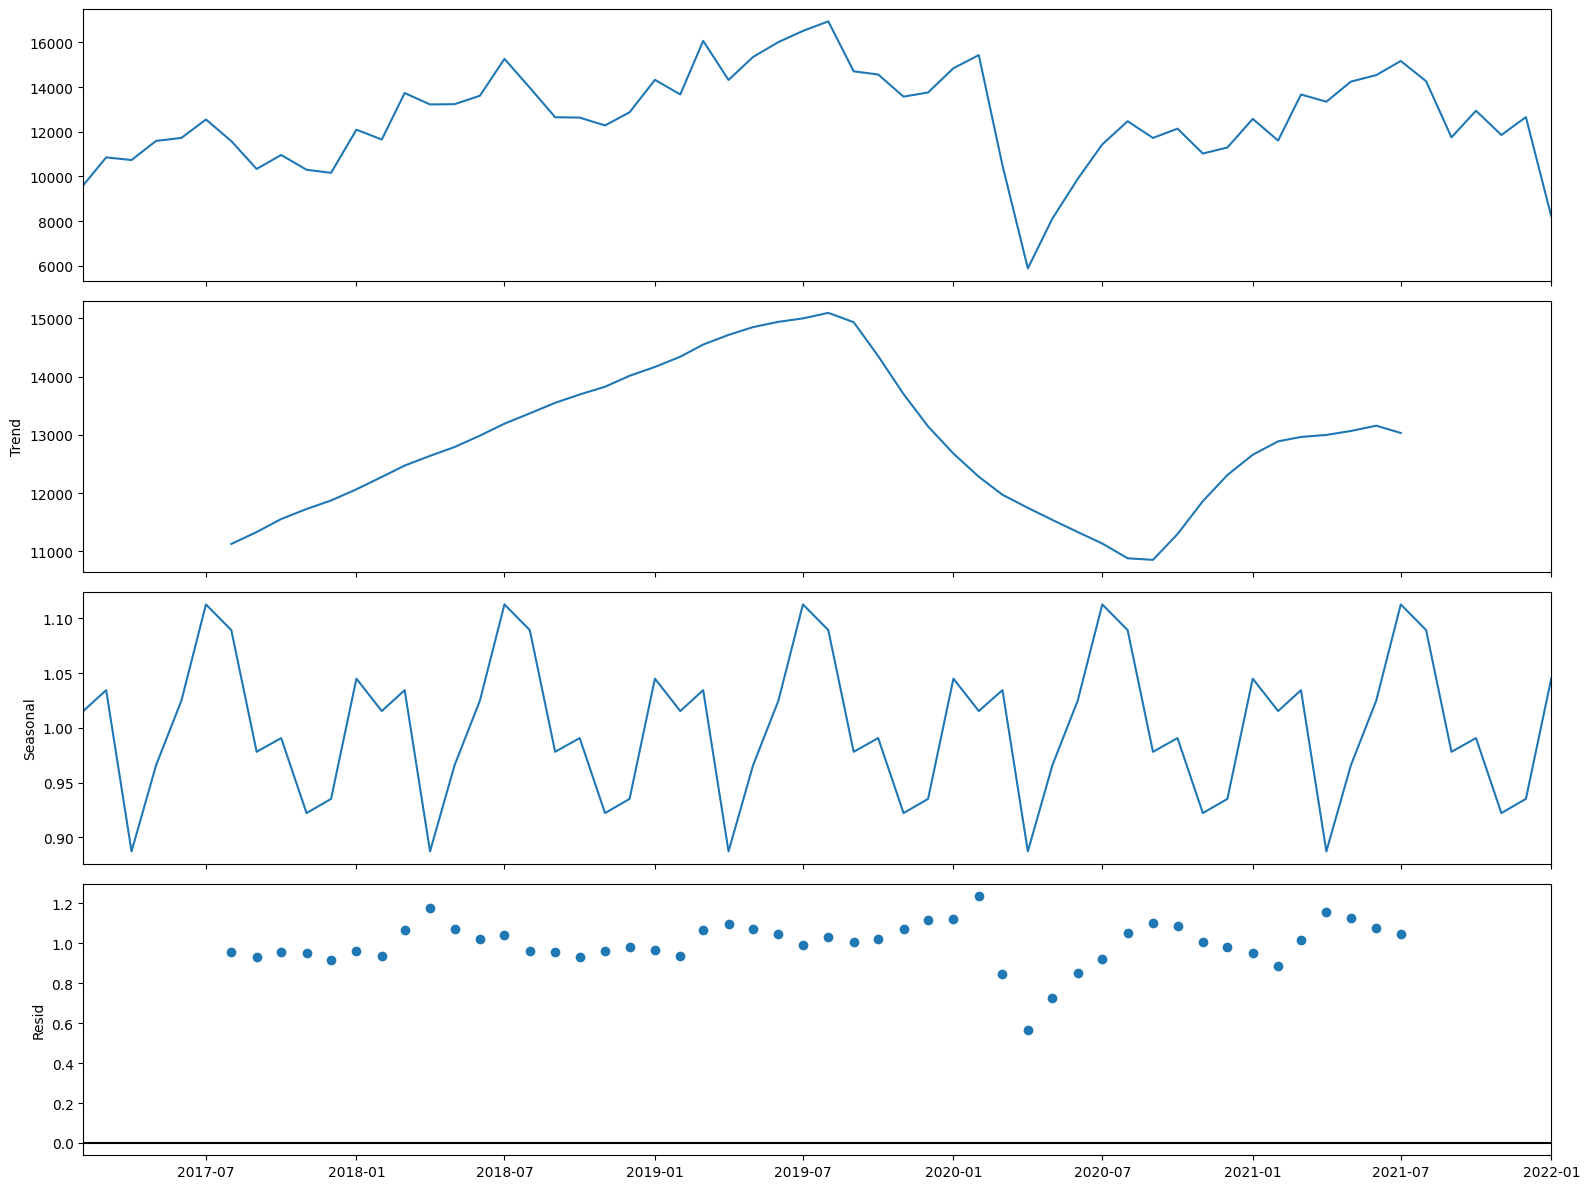

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition= seasonal_decompose(review_high_rated, model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize' : (16,12)})
multiplicative_decomposition.plot ( )
plt.show( )

In [60]:
sentiment_df=pd. read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
SUM(useful) as useful_count,
SUM(funny) as funny_count,
SUM(cool) as cool_count
FROM
reviews
GROUP BY business_id) as s
JOIN businesses as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count""", conn)

sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [61]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
29613,I2_0af3Gu4SyAq4Qdz5cFg,3.0,175,122,26,45
29627,radib3GHt_Up9-zhUjM1ew,3.5,175,128,29,21
29633,17AnbEkqAiE66YFTDYFvgw,2.5,176,110,25,25
29652,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81,13,29


In [66]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count,success_score
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3,3.583519
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2,7.167038
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0,7.167038
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2,5.375278
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0,5.375278
...,...,...,...,...,...,...,...
29613,I2_0af3Gu4SyAq4Qdz5cFg,3.0,175,122,26,45,15.511452
29627,radib3GHt_Up9-zhUjM1ew,3.5,175,128,29,21,18.096694
29633,17AnbEkqAiE66YFTDYFvgw,2.5,176,110,25,25,12.940374
29652,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81,13,29,20.704599


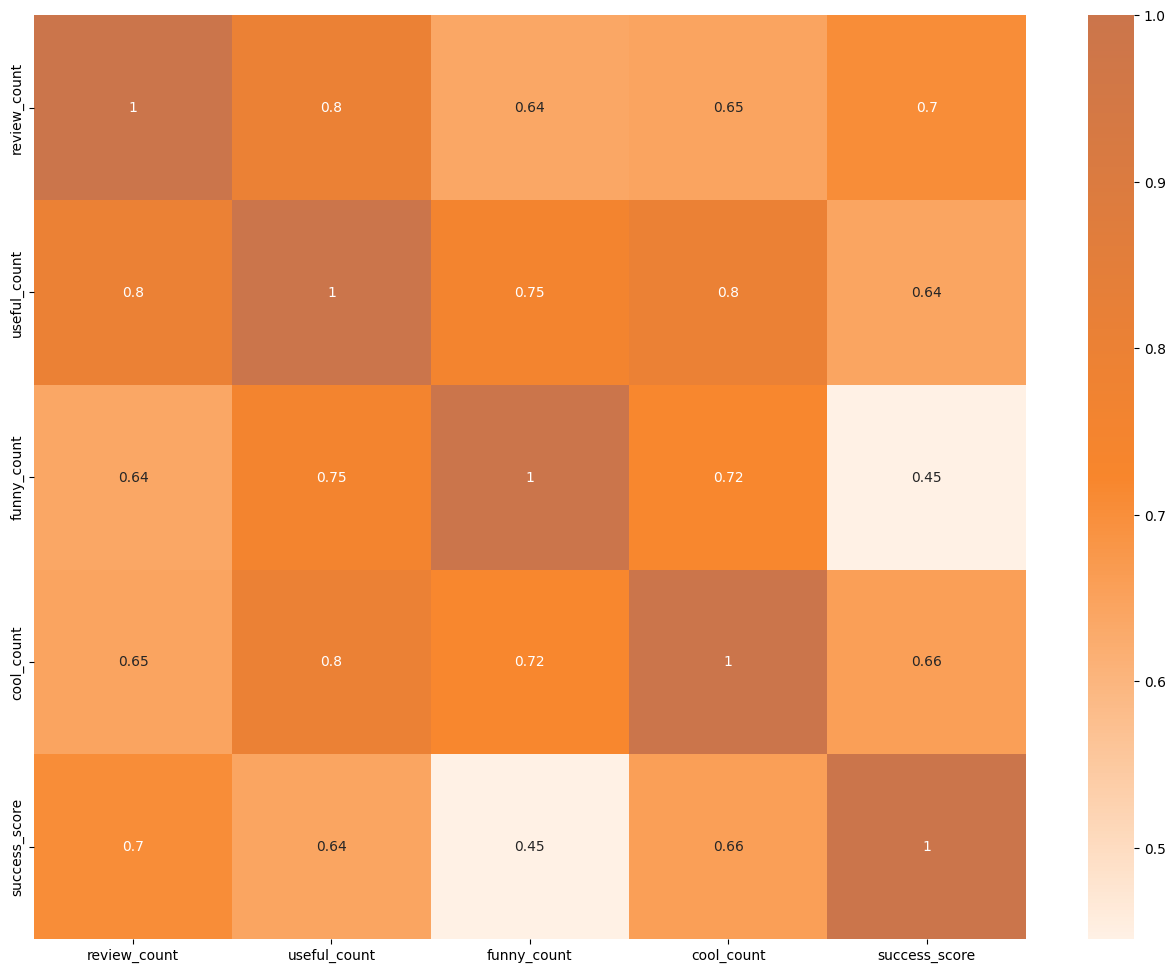

In [67]:
sns.heatmap(sentiment_df[['review_count', 'useful_count', 'funny_count', 'cool_count', 'success_score']].corr(), annot=True, cmap=LinearSegmentedColormap.from_list('custom', colours))
plt.show()

In [89]:
# What are the busiest hours for restaurants?

review_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H',date) as integer)
as hour,
COUNT(*) AS review_count
FROM
reviews
GROUP BY
hour;
""", conn)

tip_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H',date) as integer)
as hour,
COUNT(*) AS tip_count
FROM
tips
GROUP BY
hour;
""", conn)

checkin = pd.read_sql_query("""SELECT date FROM checkins""", conn)
checkin_engagement = []
for i in checkin['date']:
  checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()


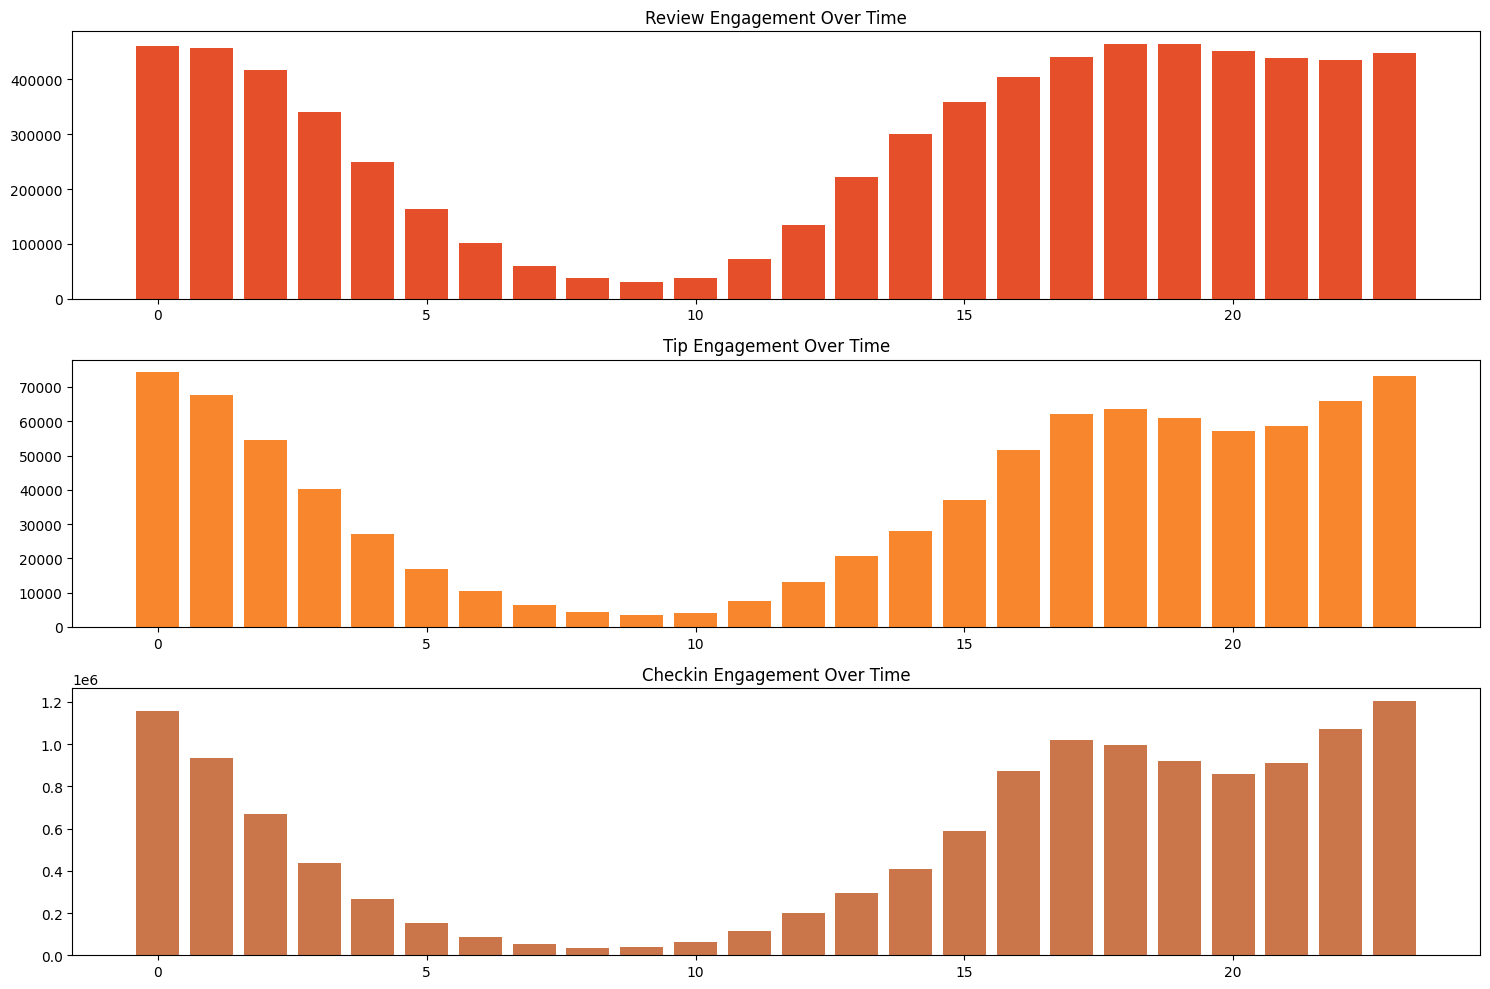

In [90]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.title('Review Engagement Over Time')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#E54F29')

plt.subplot(3,1,2)
plt.title('Tip Engagement Over Time')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#F8862C')

plt.subplot(3,1,3)
plt.title('Checkin Engagement Over Time')
plt.bar(checkin_engagement.index, checkin_engagement[0], color='#CB754B')

plt.tight_layout()
plt.show()